In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data = pd.read_excel('/content/ENB2012_data.xlsx')

In [3]:
data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [4]:
data = data.loc[:, ~data.columns.str.contains('~unnamed')]

In [5]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [6]:
data.shape

(768, 10)

In [7]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


<Axes: >

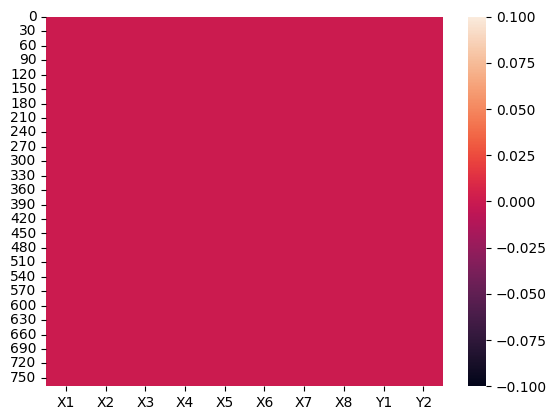

In [9]:
sns.heatmap(data.isnull())

In [10]:
data.shape

(768, 10)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


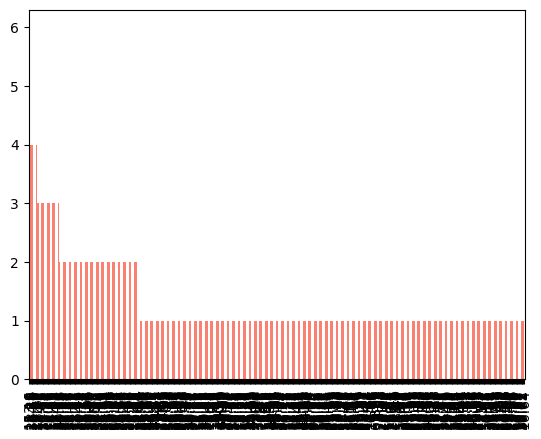

In [12]:
data['Y1'].value_counts().plot(kind='bar',color=['salmon']);

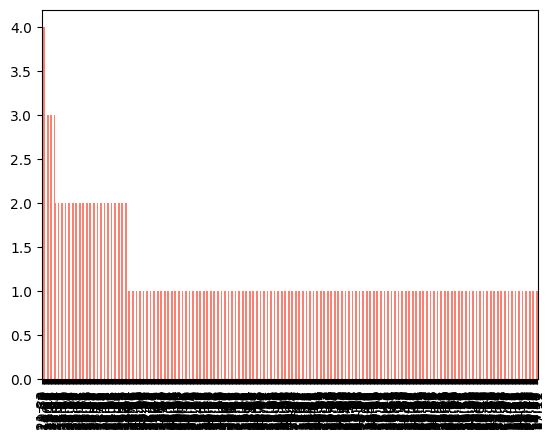

In [13]:
data['Y2'].value_counts().plot(kind='bar',color=['salmon']);

<Axes: >

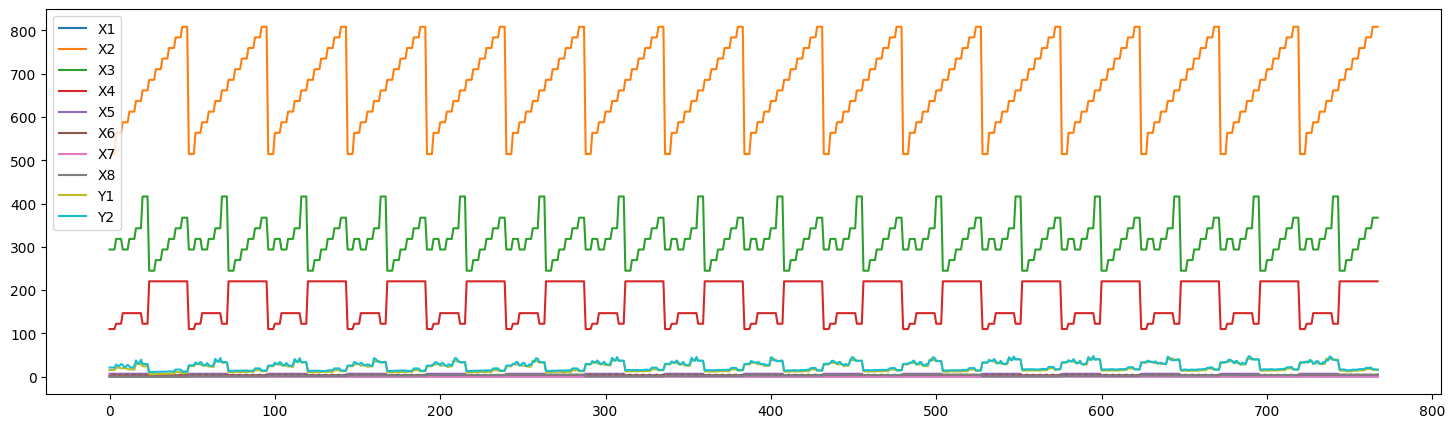

In [14]:
data.plot(figsize=(18,5))

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>,
        <Axes: title={'center': 'X6'}>],
       [<Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'Y1'}>],
       [<Axes: title={'center': 'Y2'}>, <Axes: >, <Axes: >]], dtype=object)

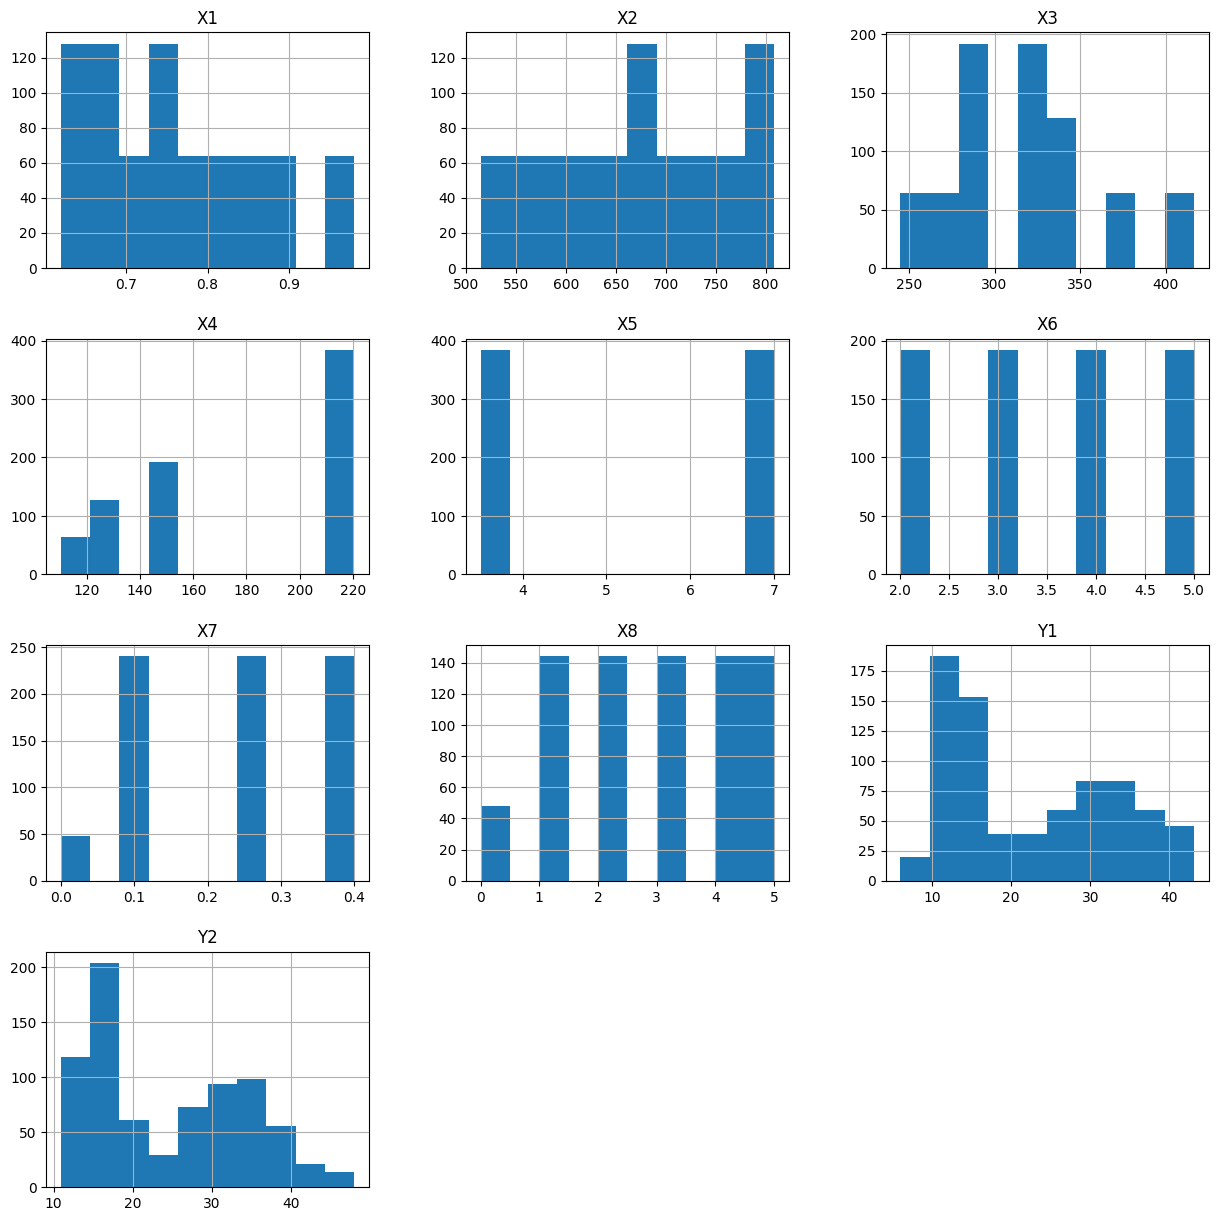

In [15]:
data.hist(figsize=(15,15))

In [16]:
X = data.drop(['Y1','Y2'], axis = 1)

In [17]:
X

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [18]:
Y = data.drop(["X1","X2","X3","X4","X5","X6","X7","X8"], axis = 1)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [22]:
print(f"""
x_train shape: {X_test.shape},
y_train shape: {Y_test.shape},
X_test shape: {X_test.shape},
Y_test shape: {Y_test.shape}
""" )


x_train shape: (154, 8),
y_train shape: (154, 2),
X_test shape: (154, 8),
Y_test shape: (154, 2)



In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_test

array([[-1.34498313,  1.52879024,  1.12425064, ..., -1.36441084,
         1.22779036,  0.12918878],
       [-0.96525229,  0.97253708, -0.00737214, ..., -1.36441084,
         0.10874541, -1.1605984 ],
       [ 2.07259443, -1.80872872, -0.57318352, ..., -1.36441084,
         1.22779036,  0.12918878],
       ...,
       [ 0.93340191, -0.97434898, -0.57318352, ..., -1.36441084,
         0.10874541, -0.51570481],
       [ 0.93340191, -0.97434898, -0.57318352, ..., -1.36441084,
         0.10874541, -1.1605984 ],
       [-0.49058874,  0.41628392, -1.13899491, ...,  0.44108109,
         0.10874541,  0.77408237]])

In [26]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [27]:
Y_pred = model.predict(X_test)

In [28]:
Y_pred

array([[18.7598904 , 19.54292019],
       [14.01898252, 16.68653984],
       [31.58020465, 32.4404394 ],
       [35.62255927, 36.51182173],
       [15.56139239, 17.39592073],
       [29.74212619, 32.22777232],
       [25.51579876, 28.21830959],
       [28.52041701, 30.35005636],
       [17.36639992, 18.91717558],
       [28.61006415, 30.96305357],
       [17.13203784, 18.58958711],
       [35.25993439, 36.60405088],
       [27.97583183, 30.4319678 ],
       [ 9.42634523, 13.05628231],
       [18.96588087, 19.7311648 ],
       [37.12011131, 38.083942  ],
       [37.97502117, 38.44957289],
       [11.68639239, 14.73967073],
       [15.17252016, 17.46442288],
       [34.91523354, 36.35918985],
       [34.66209074, 35.79804648],
       [35.11235026, 36.39105187],
       [10.66966342, 14.30993205],
       [30.99212619, 33.22777232],
       [13.30134523, 15.71253231],
       [30.64742533, 32.9829113 ],
       [33.18532785, 34.28846671],
       [33.62798818, 35.0634634 ],
       [14.70648252,

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
print("RMSE : ",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE :  3.132118000080222


In [34]:
print("R2_Score: ",r2_score(Y_test,Y_pred))

R2_Score:  0.8997338948958488


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
reg = RandomForestRegressor(n_estimators = 300, max_depth = 5, max_features = 'sqrt', oob_score = False)
reg.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300)

In [39]:
reg.score(X_test,Y_test)

0.9682311461863846

In [41]:
from sklearn import metrics
metrics.mean_squared_error(Y_test,reg.predict(X_test))

3.0634456218037083